# 1960년도 이후, 대륙별 올림픽 효자 종목 10선

In [1]:
!pip install --upgrade seaborn
!pip install ipywidgets
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
# 경고 메시지 무시
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# 데이터 불러오기
df = pd.read_csv('athlete_events.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# 데이터 복사
df_continent = df.copy()

In [6]:
df_continent.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
# 국가별 코드와 대륙 정보를 딕셔너리로 정리
continent_mapping = {
    'ALG': 'Africa', 'ANG': 'Africa', 'BEN': 'Africa', 'BOT': 'Africa', 'BUR': 'Africa', 'BDI': 'Africa',
    'CMR': 'Africa', 'CPV': 'Africa', 'CAF': 'Africa', 'CHA': 'Africa', 'COM': 'Africa', 'CGO': 'Africa',
    'COD': 'Africa', 'CIV': 'Africa', 'DJI': 'Africa', 'EGY': 'Africa', 'ERI': 'Africa', 'SWZ': 'Africa',
    'ETH': 'Africa', 'GAB': 'Africa', 'GAM': 'Africa', 'GHA': 'Africa', 'GUI': 'Africa', 'GBS': 'Africa',
    'GEQ': 'Africa', 'KEN': 'Africa', 'LES': 'Africa', 'LBR': 'Africa', 'LBA': 'Africa', 'MAD': 'Africa',
    'MAW': 'Africa', 'MLI': 'Africa', 'MAR': 'Africa', 'MRI': 'Africa', 'MTN': 'Africa', 'MOZ': 'Africa',
    'NAM': 'Africa', 'NIG': 'Africa', 'NGR': 'Africa', 'UGA': 'Africa', 'RWA': 'Africa', 'STP': 'Africa',
    'SEN': 'Africa', 'SEY': 'Africa', 'SLE': 'Africa', 'SOM': 'Africa', 'RSA': 'Africa', 'SSD': 'Africa',
    'SUD': 'Africa', 'TAN': 'Africa', 'TOG': 'Africa', 'TUN': 'Africa', 'ZAM': 'Africa', 'ZIM': 'Africa',
    'ANT': 'America', 'ARG': 'America', 'ARU': 'America', 'BAH': 'America', 'BAR': 'America', 'BIZ': 'America',
    'BER': 'America', 'BOL': 'America', 'BRA': 'America', 'CAY': 'America', 'CAN': 'America', 'CHI': 'America',
    'COL': 'America', 'CRC': 'America', 'CUB': 'America', 'DOM': 'America', 'DMA': 'America', 'ESA': 'America',
    'ECU': 'America', 'GRN': 'America', 'GUA': 'America', 'GUY': 'America', 'HAI': 'America', 'HON': 'America',
    'JAM': 'America', 'MEX': 'America', 'NCA': 'America', 'PAN': 'America', 'PAR': 'America', 'PER': 'America',
    'PUR': 'America', 'SKN': 'America', 'LCA': 'America', 'VIN': 'America', 'SUR': 'America', 'TTO': 'America',
    'USA': 'America', 'URU': 'America', 'VEN': 'America', 'IVB': 'America', 'ISV': 'America',
    'AFG': 'Asia', 'BRN': 'Asia', 'BAN': 'Asia', 'BHU': 'Asia', 'BRU': 'Asia', 'CAM': 'Asia', 'CHN': 'Asia',
    'KOR': 'Asia', 'HKG': 'Asia', 'IND': 'Asia', 'INA': 'Asia', 'IRI': 'Asia', 'IRQ': 'Asia', 'JPN': 'Asia',
    'JOR': 'Asia', 'KAZ': 'Asia', 'KGZ': 'Asia', 'KUW': 'Asia', 'LAO': 'Asia', 'LBN': 'Asia', 'MAS': 'Asia',
    'MDV': 'Asia', 'MGL': 'Asia', 'MYA': 'Asia', 'NEP': 'Asia', 'OMA': 'Asia', 'PAK': 'Asia', 'PLE': 'Asia',
    'PHI': 'Asia', 'QAT': 'Asia', 'PRK': 'Asia', 'KSA': 'Asia', 'SGP': 'Asia', 'SRI': 'Asia', 'SYR': 'Asia',
    'TJK': 'Asia', 'TPE': 'Asia', 'THA': 'Asia', 'TLS': 'Asia', 'TKM': 'Asia', 'UAE': 'Asia', 'UZB': 'Asia',
    'VIE': 'Asia', 'YEM': 'Asia',
    'ALB': 'Europe', 'AND': 'Europe', 'ARM': 'Europe', 'AUT': 'Europe', 'AZE': 'Europe', 'BEL': 'Europe',
    'BIH': 'Europe', 'BUL': 'Europe', 'CYP': 'Europe', 'CRO': 'Europe', 'CZE': 'Europe', 'DEN': 'Europe',
    'ESP': 'Europe', 'EST': 'Europe', 'FIN': 'Europe', 'FRA': 'Europe', 'GEO': 'Europe', 'GER': 'Europe',
    'GBR': 'Europe', 'GRE': 'Europe', 'HUN': 'Europe', 'IRL': 'Europe', 'ISL': 'Europe', 'ISR': 'Europe',
    'ITA': 'Europe', 'KOS': 'Europe', 'LAT': 'Europe', 'LIE': 'Europe', 'LTU': 'Europe', 'LUX': 'Europe',
    'MKD': 'Europe', 'MLT': 'Europe', 'MDA': 'Europe', 'MON': 'Europe', 'MNE': 'Europe', 'NED': 'Europe',
    'NOR': 'Europe', 'POL': 'Europe', 'POR': 'Europe', 'ROU': 'Europe', 'SMR': 'Europe', 'SRB': 'Europe',
    'SVK': 'Europe', 'SLO': 'Europe', 'SWE': 'Europe', 'SUI': 'Europe', 'TUR': 'Europe', 'UKR': 'Europe',
    'ASA': 'Oceania', 'AUS': 'Oceania', 'COK': 'Oceania', 'FIJ': 'Oceania', 'GUM': 'Oceania', 'KIR': 'Oceania',
    'MHL': 'Oceania', 'FSM': 'Oceania', 'NRU': 'Oceania', 'NZL': 'Oceania', 'PLW': 'Oceania', 'PNG': 'Oceania',
    'SOL': 'Oceania', 'SAM': 'Oceania', 'TGA': 'Oceania', 'TUV': 'Oceania', 'VAN': 'Oceania'
}

In [8]:
# 새로운 대륙 컬럼을 추가하고 NOC 코드에 따른 대륙을 매핑
df_continent['Continent'] = df_continent['NOC'].map(continent_mapping)

In [9]:
df_continent.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Asia
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,Asia
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Europe
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Europe
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Europe


In [10]:
# 개체 연도별 순서별로 저장
df_yearSorted = df_continent.sort_values(by='Year')
df_yearSorted.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent
222010,111580,Athanasios Skaltsogiannis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 110 metres Hurdles,NaN,Europe
222011,111580,Athanasios Skaltsogiannis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,NaN,Europe
81063,41160,Dimitrios P. Golemis,M,21.0,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 800 metres,Bronze,Europe
81064,41160,Dimitrios P. Golemis,M,21.0,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",NaN,Europe
24682,12929,John Mary Pius Boland,M,25.0,NaN,NaN,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,Gold,Europe


In [11]:
# 최근 1960년 이전 기록 삭제
df_continent = df_continent[df_continent['Year']>1960]
df_continent.sort_values(by='Year').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent
180020,90485,Enrique Padilla,M,30.0,171.0,66.0,Mexico,MEX,1964 Summer,1964,Summer,Tokyo,Modern Pentathlon,Modern Pentathlon Men's Team,NaN,America
180049,90500,Flix Padron Borroto,M,27.0,165.0,61.0,Cuba,CUB,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Men's Individual All-Around,NaN,America
180050,90500,Flix Padron Borroto,M,27.0,165.0,61.0,Cuba,CUB,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Men's Team All-Around,NaN,America
180051,90500,Flix Padron Borroto,M,27.0,165.0,61.0,Cuba,CUB,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Men's Floor Exercise,NaN,America
180052,90500,Flix Padron Borroto,M,27.0,165.0,61.0,Cuba,CUB,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Men's Horse Vault,NaN,America


In [12]:
df_continent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199837 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         199837 non-null  int64  
 1   Name       199837 non-null  object 
 2   Sex        199837 non-null  object 
 3   Age        198943 non-null  float64
 4   Height     189679 non-null  float64
 5   Weight     189061 non-null  float64
 6   Team       199837 non-null  object 
 7   NOC        199837 non-null  object 
 8   Games      199837 non-null  object 
 9   Year       199837 non-null  int64  
 10  Season     199837 non-null  object 
 11  City       199837 non-null  object 
 12  Sport      199837 non-null  object 
 13  Event      199837 non-null  object 
 14  Medal      27342 non-null   object 
 15  Continent  177379 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 25.9+ MB


In [13]:
# 메달 점수 매핑 딕셔너리 생성
medal_points = {
    'Gold': 3,    # 금메달 3점
    'Silver': 2,  # 은메달 2점
    'Bronze': 1,  # 동메달 1점
    'NA': None  # None 값을 그대로 유지
}

In [14]:
# 'Medal' 컬럼의 값을 점수로 변환하여 'Points' 컬럼에 추가
df_continent['Points'] = df_continent['Medal'].map(medal_points)

In [15]:
df_continent.head(50)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent,Points
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Asia,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,Asia,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Europe,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Europe,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Europe,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Europe,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Europe,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Europe,NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,America,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,America,NaN


In [16]:
# 같은 대륙과 스포츠 종목을 묶어 그룹으로 묶은후 각 그룹의 Point를 합산
df_total_points = df_continent.groupby(['Continent', 'Sport'])['Points'].sum().reset_index()

# 각 대륙별로 점수 합계가 높은 상위 10개 종목 추출
df_top_10_sports_by_continent = df_total_points.groupby('Continent').apply(lambda x: x.nlargest(10, 'Points')).reset_index(drop=True)
# nlargest(10, 'Points')는 Points 열에서 가장 큰 값을 기준으로 10개의 행을 선택

# 결과 확인
df_top_10_sports_by_continent

<ipython-input-16-21db5d23f48a>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_10_sports_by_continent = df_total_points.groupby('Continent').apply(lambda x: x.nlargest(10, 'Points')).reset_index(drop=True)


,Continent,Sport,Points
0,Africa,Athletics,512.0
1,Africa,Football,172.0
2,Africa,Swimming,61.0
3,Africa,Boxing,52.0
4,Africa,Hockey,45.0
5,Africa,Rowing,18.0
6,Africa,Rugby Sevens,13.0
7,Africa,Taekwondo,12.0
8,Africa,Judo,6.0
9,Africa,Wrestling,6.0


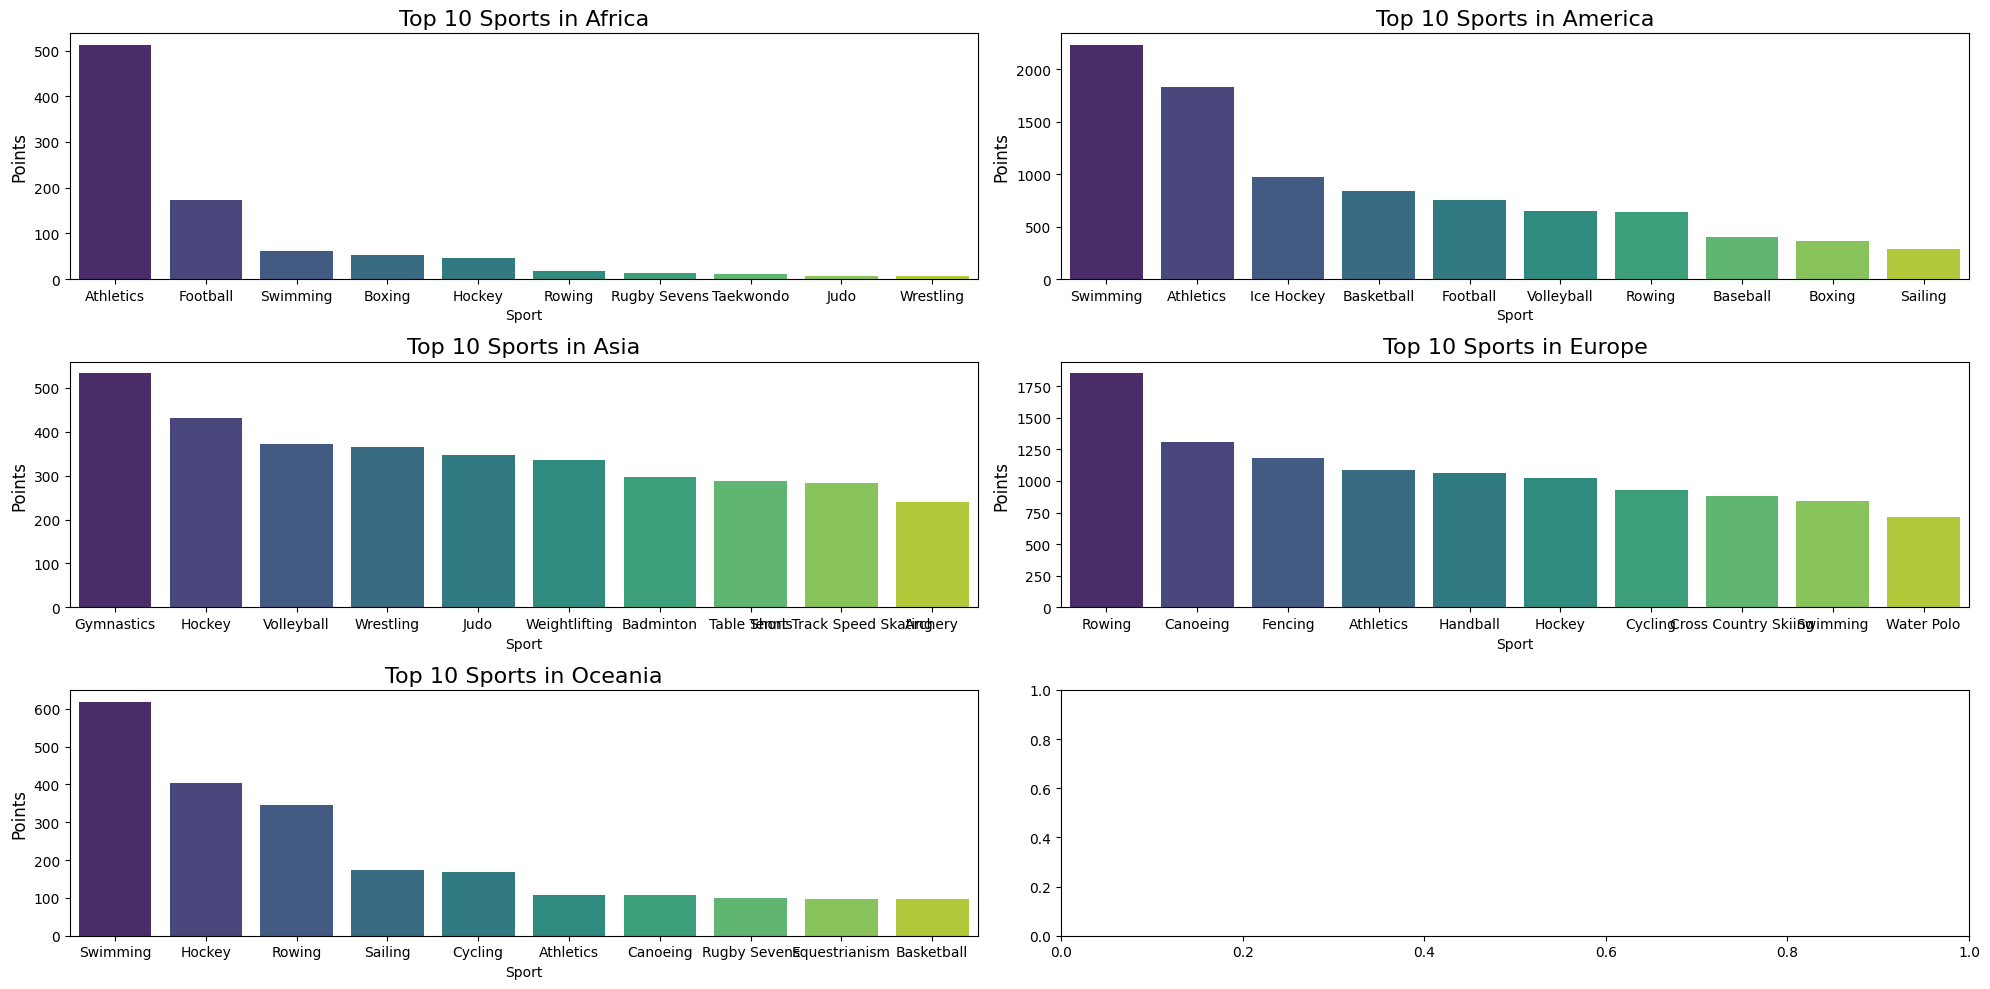

In [36]:
continents = df_top_10_sports_by_continent['Continent'].unique()

# Figure와 Axes 객체 생성
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

# 대륙별 그래프 그리기
for i, continent in enumerate(continents):
    # # 행과 열 계산
    row = i // 2
    col = i % 2

    # 해당 대륙의 데이터만 필터링
    df_continent_data = df_top_10_sports_by_continent[df_top_10_sports_by_continent['Continent'] == continent]

    # 그래프 그리기
    sns.barplot(x='Sport', y='Points', data=df_continent_data, palette='viridis', ax=axes[row, col])

    # 그래프 제목과 축 레이블 설정
    axes[row, col].set_title(f'Top 10 Sports in {continent}', fontsize=16)
    axes[row, col].set_xlabel('Sport', fontsize=10)
    axes[row, col].set_ylabel('Points', fontsize=12)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [37]:
continent_dropdown = widgets.Dropdown(
    options=df_top_10_sports_by_continent['Continent'].unique(),
    description='Continent:'
)

# 그래프 출력 함수
def plot_graph(continent):
    # 해당 대륙의 데이터만 필터링
    df_continent_data = df_top_10_sports_by_continent[df_top_10_sports_by_continent['Continent'] == continent]

    # 그래프 그리기
    plt.figure(figsize=(20, 5))
    sns.barplot(x='Sport', y='Points', data=df_continent_data, palette='viridis')

    # 그래프 제목과 축 레이블 설정
    plt.title(f'Top 10 Sports in {continent}', fontsize=16)
    plt.xlabel('Sport', fontsize=12)
    plt.ylabel('Points', fontsize=12)

    # 그래프 보여주기
    plt.show()

# 위젯과 그래프 출력 함수 연결
widgets.interactive(plot_graph, continent=continent_dropdown)

interactive(children=(Dropdown(description='Continent:', options=('Africa', 'America', 'Asia', 'Europe', 'Ocea…

In [101]:
import pandas as pd

# 1. 하키 종목과 아시아 대륙 데이터 필터링
df_hockey_asia = df_continent[(df_continent['Sport'] == 'Hockey') & (df_continent['Continent'] == 'Asia')]

# 2. 국가별 포인트 합산
df_hockey_asia_points = df_hockey_asia.groupby('Team')['Points'].sum().reset_index()

# 3. 국가별 메달 종류별 개수 집계
df_hockey_asia_medals = df_hockey_asia.groupby('Team').agg({
    'Medal': 'count',                          # 총 메달 수
    'Medal': lambda x: (x == 'Gold').sum(),     # 금메달 수
    'Medal': lambda x: (x == 'Silver').sum(),   # 은메달 수
    'Medal': lambda x: (x == 'Bronze').sum()    # 동메달 수
}).reset_index()

# Calculate medal counts directly from df_hockey_asia
df_hockey_asia_medals['Gold'] = df_hockey_asia.groupby('Team')['Medal'].apply(lambda x: (x == 'Gold').sum()).reset_index(drop=True)
df_hockey_asia_medals['Silver'] = df_hockey_asia.groupby('Team')['Medal'].apply(lambda x: (x == 'Silver').sum()).reset_index(drop=True)
df_hockey_asia_medals['Bronze'] = df_hockey_asia.groupby('Team')['Medal'].apply(lambda x: (x == 'Bronze').sum()).reset_index(drop=True)

# Drop the original 'Medal' column
df_hockey_asia_medals = df_hockey_asia_medals.drop('Medal', axis=1)

# Merge with points data
df_hockey_asia = pd.merge(df_hockey_asia_medals, df_hockey_asia_points, on='Team')

# Remove countries with 0 points
df_hockey_asia = df_hockey_asia[df_hockey_asia['Points'] != 0]
df_hockey_asia

,Team,Gold,Silver,Bronze,Points
0,China,0,16,0,32.0
2,India,31,0,30,123.0
5,Pakistan,29,31,32,181.0
6,South Korea,0,48,0,96.0


## 대륙별 올릭픽 강세 종목에 대한 분석 및 적용

* 종목별 훈련 프로그램 개발: 강세 종목에서의 성과를 유지하면서도 약한 종목에서 성과를 내기 위한 훈련 전략을 마련

* 메달 획득 예측 및 전략: 올림픽이나 세계 선수권 대회에서 각 국가 또는 대륙의 메달 획득 가능성을 예측. 이를 통해 국가별 메달 목표 설정

* 스포츠 과학 연구: 각 대륙별 강세 종목에서 신체적 특성이나 훈련 방법을 연구함으로써, 성과를 높이는 과학적 접근법을 개발

* 인기 스포츠 마케팅 : 각 대륙에서 인기 있는 스포츠에 대한 정보를 활용해 스포츠 마케팅에 활용